# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from matplotlib import pyplot as plt

## Import Dataset

In [2]:
users = pd.read_csv('./CSVs/BX-Users.csv', error_bad_lines=False, sep=';', encoding="latin1")

In [3]:
books = pd.read_csv('./CSVs/BX-Books.csv', error_bad_lines=False, sep=';', encoding="latin1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\asreno\appdata\local\programs\python\python39\lib\site-packages\I

In [4]:
ratings = pd.read_csv('./CSVs/BX-Book-Ratings.csv', error_bad_lines=False, sep=';', encoding="latin1")

In [5]:
print('The shape of Ratings is: ' + str(ratings.shape))
print('The shape of Users is: ' + str(users.shape))
print('The shape of Books is: ' + str(books.shape))

The shape of Ratings is: (1149780, 3)
The shape of Users is: (278858, 3)
The shape of Books is: (271360, 8)


## Data Preprocessing

### Users DataFrame

In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.columns = ['userId', 'location', 'age']

<AxesSubplot:>

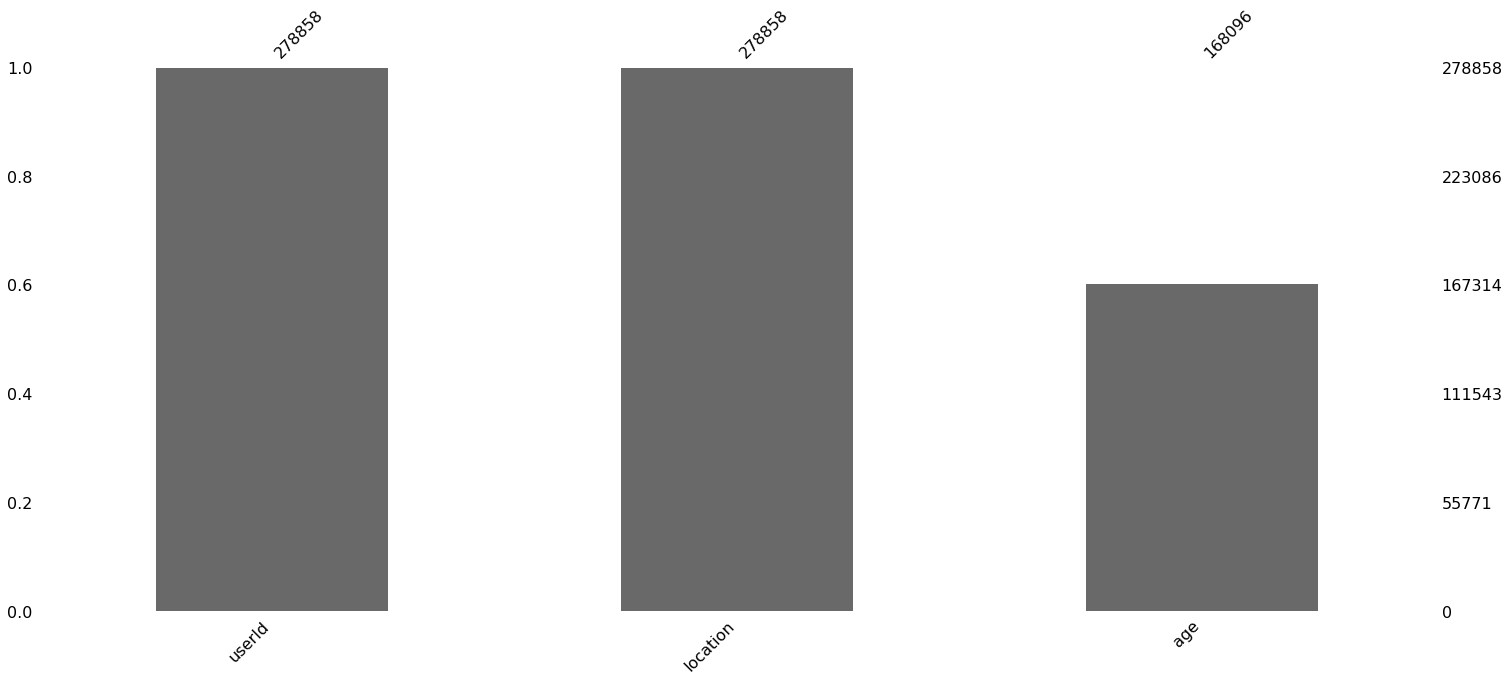

In [8]:
import missingno as msno
msno.bar(users)

In [9]:
users.age = users.age.astype(float)
print("Users with age < 5: ", users.loc[users.age<5,'age'].count())
print("Users with age > 110: ", users.loc[users.age > 110,'age'].count())
users.loc[users.age < 5,'age'] = np.nan
users.loc[users.age > 110,'age'] = np.nan

Users with age < 5:  882
Users with age > 110:  96


In [10]:
temp_age_series = pd.Series(np.random.normal(loc=users.age.mean(), scale=users.age.std(), size=users.userId[users.age.isna()]
                                             .count()))
print("Statistics of values in \'users.age\'\n",users.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")
print("As we can see the destribution doesnt change a lot. There are some negative values thought.\n")

# print()

# take the abs value of temp_age_series
pos_age_series = np.abs(temp_age_series)

# sort users Df so as NaN values in age to be first and reset index to match with index of pos_age_series. Then use fillna()
users = users.sort_values('age',na_position='first').reset_index(drop=True)
users.age.fillna(pos_age_series, inplace = True)  

# replace values < 5 with the mean(). Round values and convert them to int. 
users.loc[users.age<5, 'age'] = users.age.mean()
users.age = users.age.round().astype(int)
#Sort users based on user_id so as to be the same as before
users = users.sort_values('userId').reset_index(drop=True)
print(users.age.describe(),"\n")

Statistics of values in 'users.age'
 count    167118.000000
mean         34.858244
std          13.901748
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    111740.000000
mean         34.888609
std          13.941072
min         -27.323718
25%          25.475357
50%          34.907089
75%          44.322568
max         110.348270
dtype: float64 

Negative values in 'temp_age_seires': 699 

As we can see the destribution doesnt change a lot. There are some negative values thought.

count    278858.000000
mean         35.072765
std          13.649613
min           5.000000
25%          25.000000
50%          34.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 



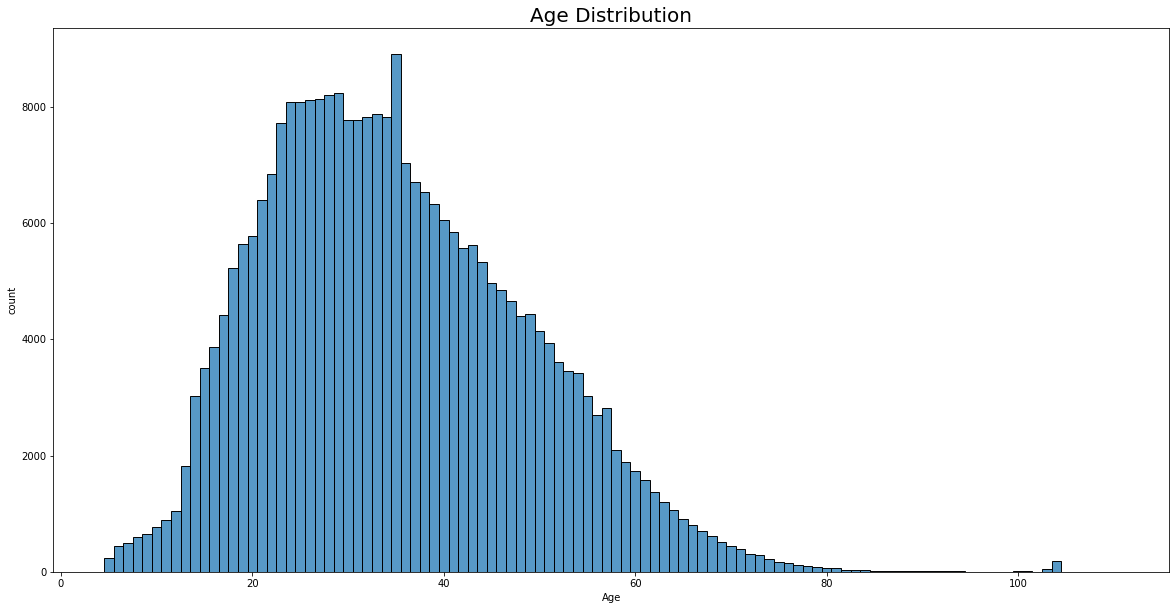

In [12]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(users['age'], discrete = True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

In [13]:
user_location_expanded=users.location.str.split(', ', n=2, expand=True)
user_location_expanded.columns=['city', 'state', 'country']
users = users.join(user_location_expanded)
users.drop(columns=['location'], inplace=True)
users.loc[users.state==',', ['state', 'country']] = 'other'
users.loc[users.country==',', ['country']] = 'other'
users.loc[(users.state=='\\n/a\\"') | (users.state=='') | (users.state=='*') | (users.state=='n.a'), ['state']] = 'n/a'
users.state.fillna('other', inplace=True)
users.fillna('n/a', inplace=True)

In [14]:
users.head()

,userId,age,city,state,country
0,1,28,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,16,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,36,farnborough,hants,united kingdom


In [15]:
users['age'] = users['age'].astype(int)
users['userId'] = users['userId'].astype(int) 

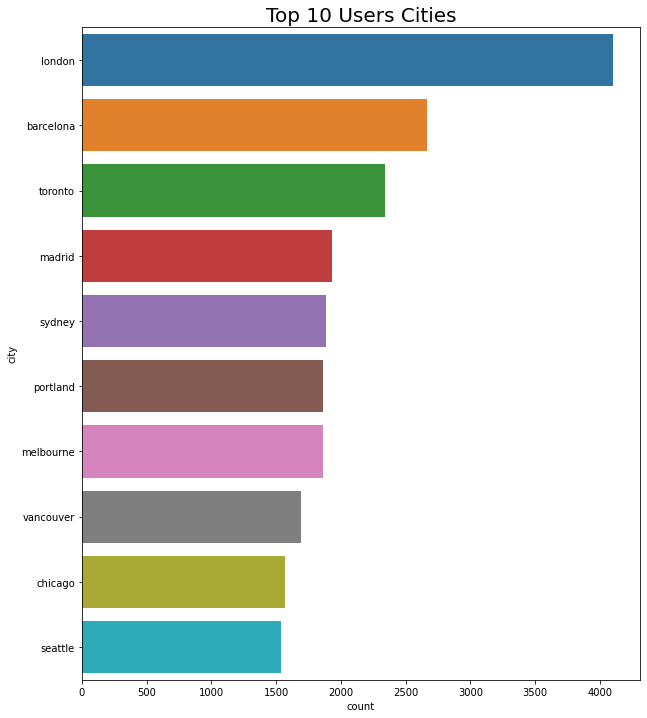

In [17]:
barplot(users,'city','Top 10 User Cities')

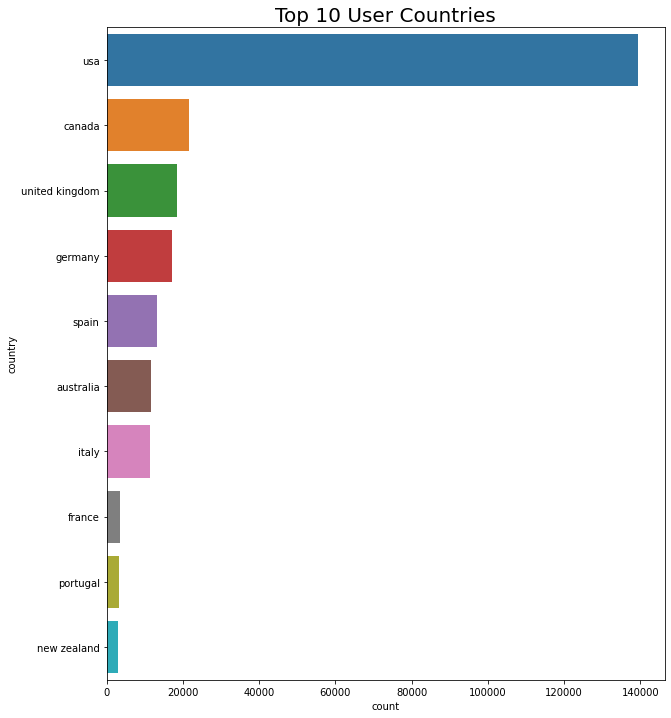

In [18]:
barplot(users,'country','Top 10 User Countries')

### Books DataFrame

In [19]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [20]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication','publisher', 'imageURLS', 'imageURLM', 'imageURLL']
books.drop(columns=['imageURLS', 'imageURLM', 'imageURLL'], inplace=True)

In [21]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')
zero_yr = books[books.yearOfPublication == 0].yearOfPublication.count()
nan_yr = books.yearOfPublication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')
books.loc[(books.yearOfPublication == 0)|(books.yearOfPublication > 2021) | (books.yearOfPublication < 1950) ,'yearOfPublication' ] = np.nan
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(int)

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


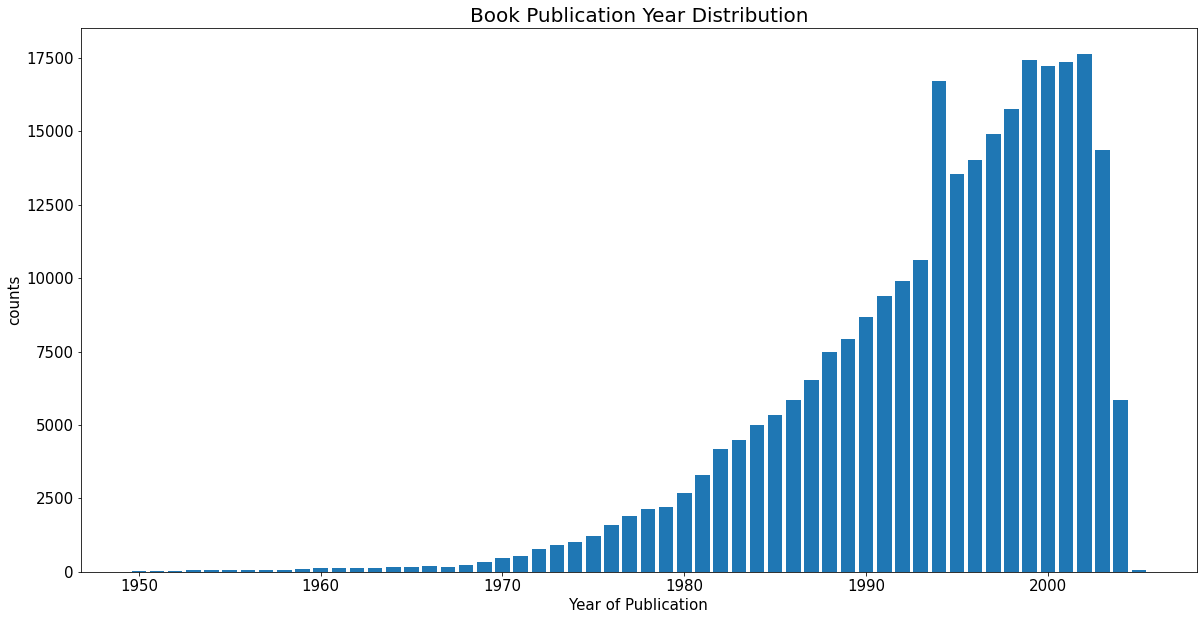

In [22]:
yr = books.yearOfPublication.value_counts().sort_index()
yr = yr.where(yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.title('Book Publication Year Distribution',size=20)
plt.show()

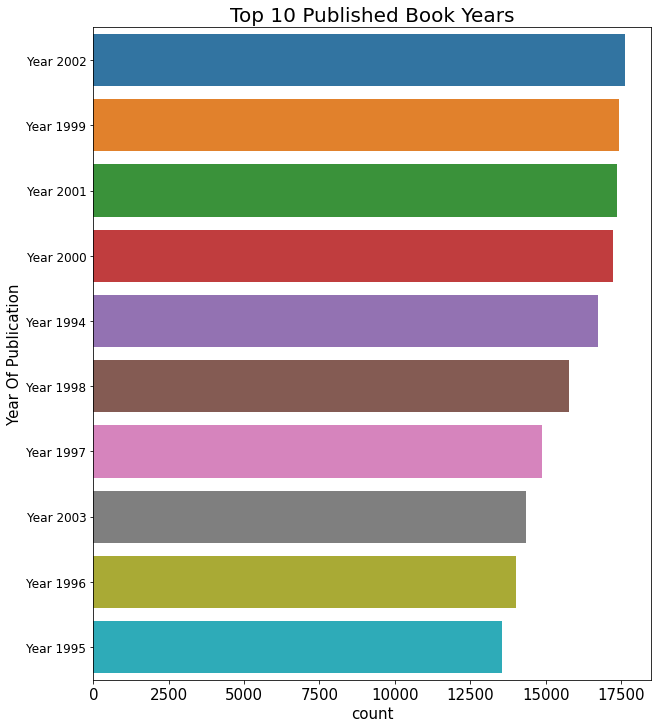

In [36]:
books_copy= books[['yearOfPublication']].copy()
books_copy['yearOfPublication'] = books_copy['yearOfPublication'].astype(int).astype(str)
books_copy = books_copy['yearOfPublication'].value_counts().head(10).reset_index()
books_copy.columns=['year','count']
books_copy['year']='Year '+ books_copy['year']

plt.figure(figsize=(10,12))
sns.barplot(x='count',y='year',data=books_copy)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Top 10 Published Book Years',size=20)
plt.show()

<AxesSubplot:>

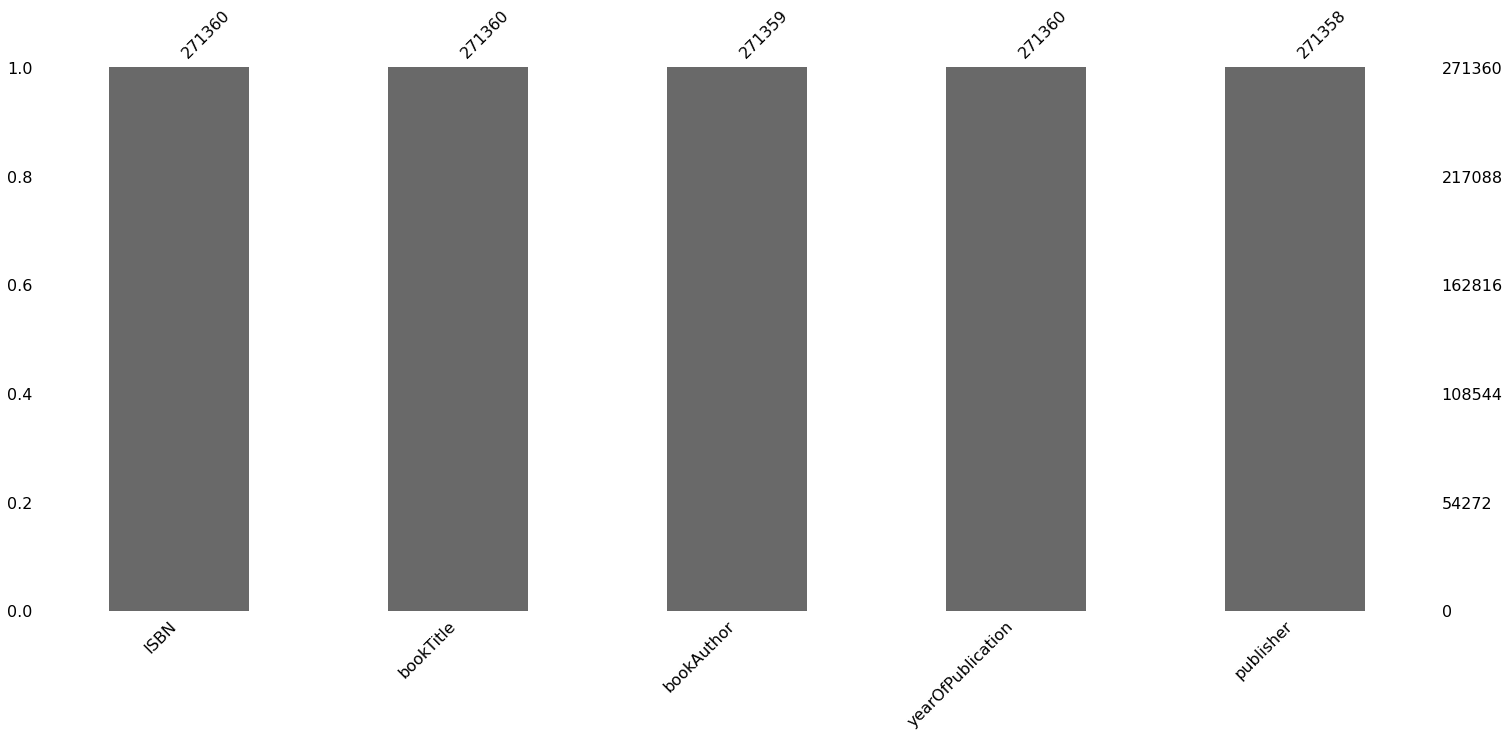

In [24]:
books.publisher = books.publisher.str.replace('&amp', '&', regex=False)
msno.bar(books)

In [25]:
books = books.dropna()
uniq_books = books.ISBN.nunique()
all_books = books.ISBN.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271357 | All book entries: 271357


In [16]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(10).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v)
    plt.ylabel(col)
    plt.title(l,size=20)
    plt.show()

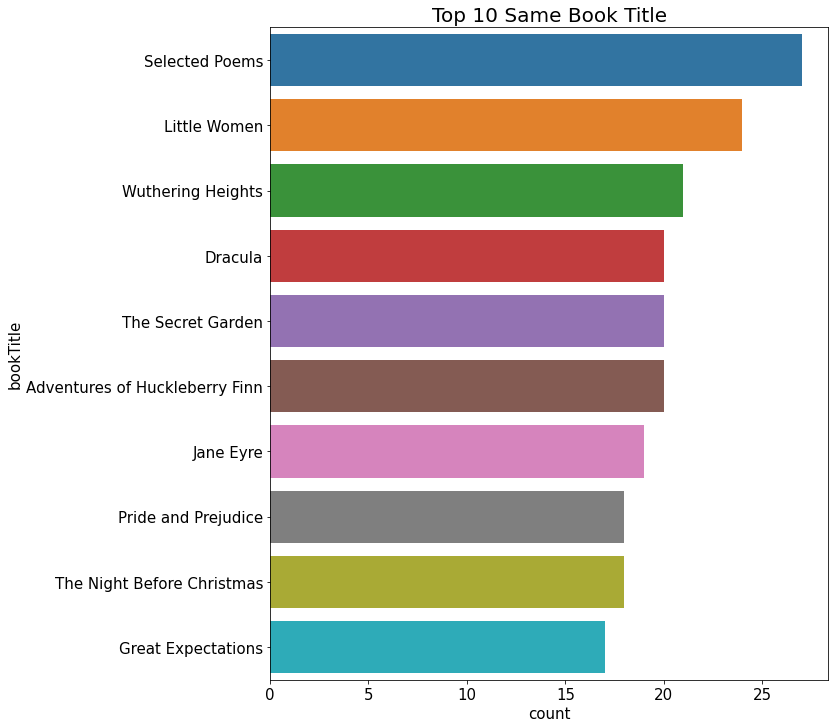

In [34]:
barplot(books,'bookTitle','Top 10 Same Book Title')

In [33]:
pap_books = books[books['bookTitle'] == 'Pride and Prejudice']
pap_books.head(18)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam
6744,0553213105,Pride and Prejudice,Jane Austen,1981,Bantam
13196,0451523652,Pride and Prejudice,Jane Austen,1988,New Amer Library Classics
16830,1566190932,Pride and Prejudice,Jane Austen,1993,Barnes Noble Classics
18484,0451525884,Pride and Prejudice,Jane Austen,1996,Signet Book
20541,0451519167,Pride and Prejudice,Jane Austen,1961,Signet Book
24229,0893756113,Pride and Prejudice,Jane Austen,1997,Troll Communications
43980,0553210181,Pride and Prejudice,Jane Austen,1981,Bantam Books
46627,0192815032,Pride and Prejudice,Jane Austen,1987,Oxford University Press
51202,0140238212,Pride and Prejudice,Jane Austen,1995,Penguin Books Ltd


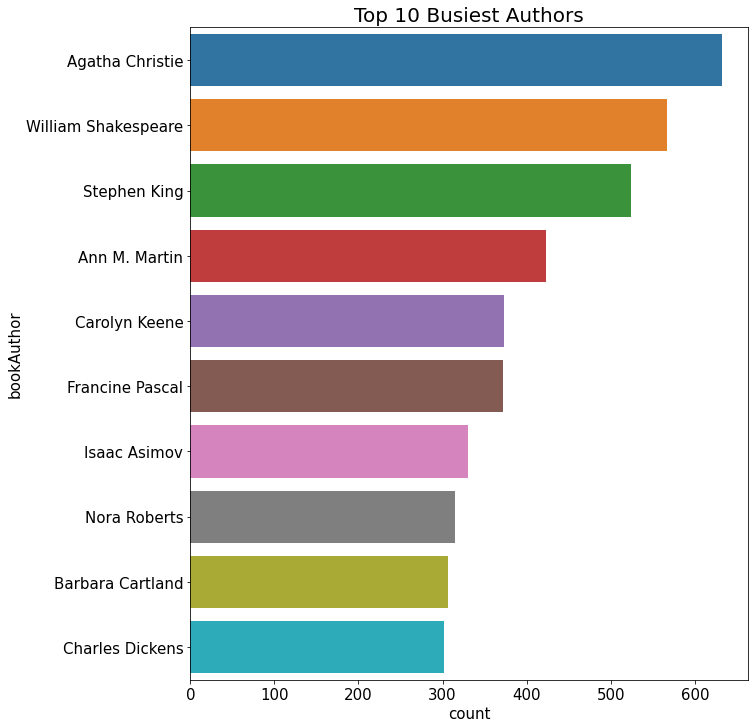

In [35]:
barplot(books,'bookAuthor','Top 10 Busiest Authors')

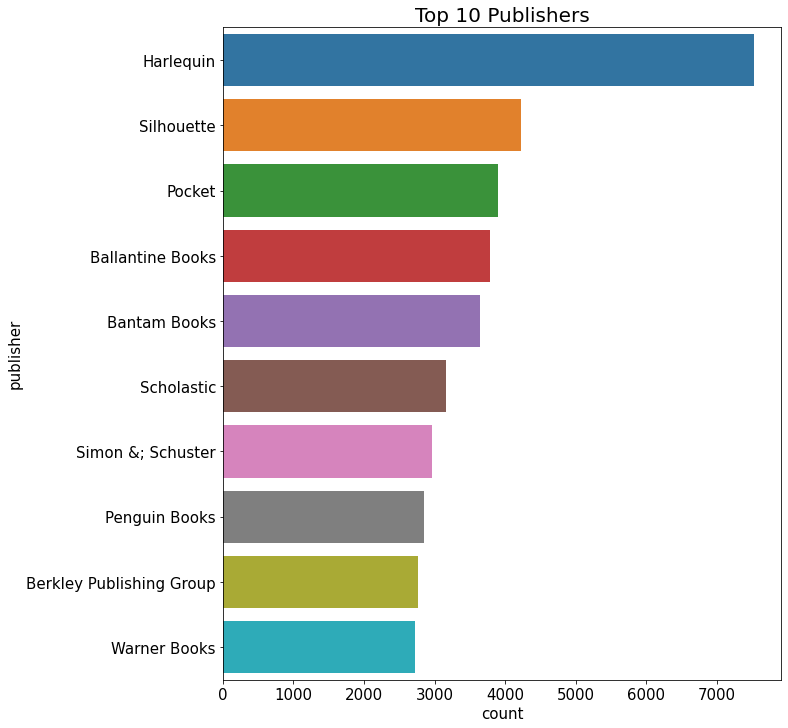

In [154]:
barplot(books,'publisher','Top 10 Publishers')

In [155]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &; Company


### Ratings DataFrame

In [119]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [120]:
ratings.columns = ['userId', 'ISBN', 'bookRating']

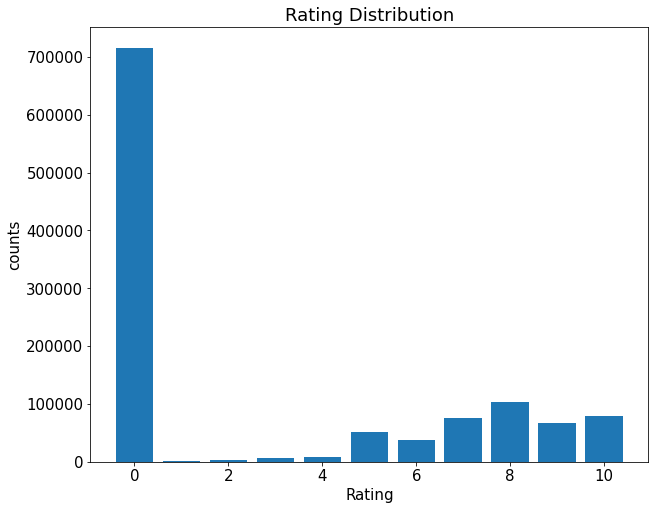

In [123]:
rtg = ratings.bookRating.value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Rating Distribution')
plt.show()

In [124]:
print(f'Size of book_ratings before removing zero ratings: {len(ratings)}')
ratings = ratings[ratings.bookRating != 0]
print(f'Size of book_ratings after removing zero ratings: {len(ratings)}')

Size of book_ratings before removing zero ratings: 1149780
Size of book_ratings after removing zero ratings: 433671


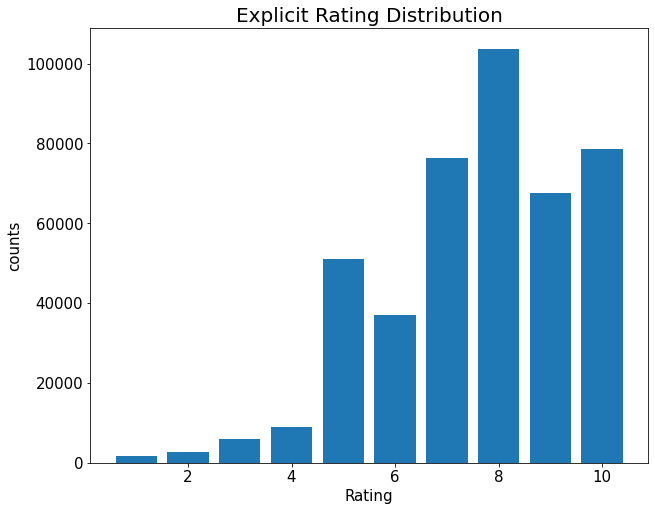

In [125]:
rtg = ratings.bookRating.value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Explicit Rating Distribution',size=20)
plt.show()

In [126]:
ratings.head()

,userId,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
